
#  <font color='green'> <b> Activity Recognition from a Single Chest-Mounted Accelerometer </b> </font> 


# <font color='red'> <b> TASK: </b> 


### ***Create an ML model that can accept raw values from a 3 DoF Sensor and classify upto 5 different activities based on the raw data.***


  ***Type of Machine Learning Problem:***
 
 
 * The task is to classify up to 5 different categories based on raw data, so it's Multi class classification problem.
 
 
 
 ***Performance Metric:***
 
 
 
 * We can use the "Accuracy" as the metric, if the data is balanced.
 
 
 * We can also use f1-score(weighted or macro).

###  ***Import Required Libraries***

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from prettytable import PrettyTable

###  **Load the Dataset**

*  As per the task I'm considering only 5 class labels.


* Due to short span of time to complete the task and lack of computational resources, I'm considering only sub-set of datapoints from the Dataset.

In [2]:
df = pd.read_csv(r"C:\Users\TARUN\Desktop\Vicara\Datasets/final_dataset.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode', nrows=70000)

print("Number of Rows and Columns in the dataset:")

print(" \n Rows: {0} \n\n Coulumns :{1} ".format(df.shape[0], df.shape[1]))

Number of Rows and Columns in the dataset:
 
 Rows: 70000 

 Coulumns :5 


In [3]:
df.columns = ['id', 'x', 'y', 'z', 'label']    #Assign Column names

* Since "id" is just for count/representation, so it's not useful feature for furthur analysis, so, we can drop this column.

In [4]:
df.drop('id', axis = 1, inplace =True)    #drop id

In [5]:
df.head()   #Top 5 datapoints after droping id column

,x,y,z,label
0,1667,2072,2047,1
1,1611,1957,1906,1
2,1601,1939,1831,1
3,1643,1965,1879,1
4,1604,1959,1921,1


In [6]:
df['label'].value_counts()   #Number of each class labels

1    33676
4    26860
3     8130
2      928
5      406
Name: label, dtype: int64

## ***Null value Check***

In [7]:
df.isnull().sum()     

x        0
y        0
z        0
label    0
dtype: int64

### ***Observation(s):***

* There are no Null values in the dataset.

In [8]:
df.info()    #details  of dataset at a glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       70000 non-null  object
 1   y       70000 non-null  object
 2   z       70000 non-null  object
 3   label   70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


###  **Observation(s):**

* Data points are of the type (Object) string so, we need to type cast them to integer type

### ***Type cast the datapoints***

In [9]:
df = df.astype(int)     # str to int

type(df.x[0])

numpy.int32

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       70000 non-null  int32
 1   y       70000 non-null  int32
 2   z       70000 non-null  int32
 3   label   70000 non-null  int32
dtypes: int32(4)
memory usage: 1.1 MB


### ***Dataset Imbalance check***

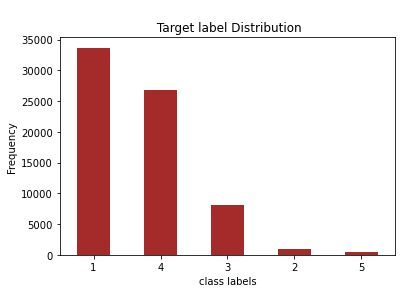

In [11]:
count_class = pd.value_counts(df['label'],sort=True)  #no of each class labels

plt.title("\n Target label Distribution") #title

plt.xlabel("class labels")  #x-label

plt.ylabel('Frequency')  #y-label

count_class.plot(kind='bar', rot = 0, color = 'brown')  #bar plot

### ***Observation(s):***

* Clearly, the dataset is an Imbalanced Dataset.


* So, we need to Balance the Dataset

### ***Balancing the Dataset***


* The dataset has huge number of records.


* If we use SMOTE Technique / other, the records will increase massively.


* I know dropping the datapoints is not good technique because we are loosing some important data.


* Due to my system computational issue and also short period of time to complete the assignment, I can't go for SMOTE/other, but in real world it's good technique to use.


In [12]:
columns = df.columns.tolist()   #column names

columns = [c for c in columns if c not in ['label']]  # x, y, z columns

target = 'label'

x = df[columns]   #  x, y, z columns

y = df[target]   #label

print(x.shape)
print(y.shape)

(70000, 3)
(70000,)


### ***Down Sampling the Dataset***

In [13]:
nm = NearMiss()   #initialize

x_ds , y_ds = nm.fit_sample(x,y)  #fit

In [14]:
counter = Counter(y)  

print('"Class labels", before Downsample: ',counter)

"Class labels", before Downsample:  Counter({1: 33676, 4: 26860, 3: 8130, 2: 928, 5: 406})


In [15]:
counter = Counter(y_ds)

print('"Class labels", after Downsample: ',counter)

"Class labels", after Downsample:  Counter({1: 406, 2: 406, 3: 406, 4: 406, 5: 406})


In [16]:
print("Shape after balencing, x : {0} and \n\t\t\t y : {1}  ".format(x_ds.shape, y_ds.shape))    

Shape after balencing, x : (2030, 3) and 
			 y : (2030,)  


In [17]:
# Making Balenced dataframe for furthur analysis

da = pd.DataFrame(x_ds) #numpy array to dataframe
db = pd.DataFrame(y_ds) #numpy array to dataframe

data = pd.concat([da, db], axis=1, ignore_index=True)  #concatinating

data.columns = ['x', 'y', 'z', 'label']    #Assign Column names

data.head(2)

,x,y,z,label
0,1899,2385,2000,1
1,1909,2383,2011,1


In [18]:
data.label.value_counts()      # All the labels are now balanced.

5    406
4    406
3    406
2    406
1    406
Name: label, dtype: int64

### ***Outlier Check***

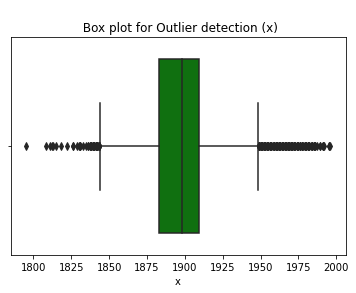

In [19]:
plt.title("\n Box plot for Outlier detection (x)") #title

sns.boxplot(x= data['x'], orient= 'h', color = 'green') #boxplot

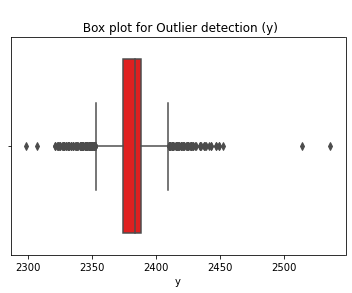

In [20]:
plt.title("\n Box plot for Outlier detection (y)") #title

sns.boxplot(x= data['y'], orient= 'h', color = 'red') #boxplot

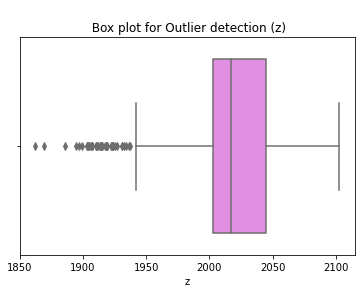

In [21]:
plt.title("\n Box plot for Outlier detection (z)") #title

sns.boxplot(x= data['z'], orient= 'h', color = 'violet') #boxplot

### **Observation(s):**

* From the above figures, we can conclude that, the features contain many outliers. so we need to remove the outliers to get better models.

### ***Outlier Removal***

In [22]:
z_score = stats.zscore(data)    # z score  numpy array

abs_z_score = np.abs(z_score)  # convert to absolute value

filter_entries = (abs_z_score < 3).all(axis=1)  # to get previous data form

new_df = data[filter_entries]   # new data frame without outliers

In [23]:
print("Before removing outliers shape of dataset:", data.shape)
print("-"*60)
print("After removing outliers shape of dataset:", new_df.shape)

Before removing outliers shape of dataset: (2030, 4)
------------------------------------------------------------
After removing outliers shape of dataset: (1968, 4)


### ***Train test split***

In [24]:
x = new_df[columns]   #  x, y, z columns

y = new_df[target]   #label

print(x.shape)
print(y.shape)

(1968, 3)
(1968,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42, stratify=y)  # train & test

In [26]:
for Shape in [X_train,y_train,X_test,y_test]:  #shapes of above each splits
    
    print(Shape.shape)

(1318, 3)
(1318,)
(650, 3)
(650,)


### ***Feature Scaling***
 
* Standardization

In [27]:
sc = StandardScaler() #initialize

sc.fit(X_train) # fit on trian data

X_train = sc.transform(X_train) # transform on train data

X_test = sc.transform(X_test) # transform on test data

#To avoid data leakage problem,Fit has to be apply on train data only.

In [28]:
X_train[0] , X_test[0]    #data after standardization

(array([-0.4435022 ,  0.11041618,  1.14069596]),
 array([-0.53750926, -1.96246606, -0.32399671]))

# ***Applying Random Forest***

In [29]:
rf = RandomForestClassifier(random_state=0)   #initialize

parameters = { 
    'n_estimators': [50, 75, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],           #for hyperparameter tuning
    'max_depth' : [10, 15, 20, 30, 50, 75, 100],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split':  [2, 4, 6]}

rf_gs = GridSearchCV(rf, param_grid=parameters, scoring='accuracy', n_jobs= -1, cv = 10, return_train_score=True)  #Grid search cv

rf_gs.fit(X_train, y_train)  # fit
 

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 50, 75, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 75, 100, 150]},
             return_train_score=True, scoring='accuracy')

In [30]:
print("Best cross-validation score: {:.2f}".format(rf_gs.best_score_))

print("Best parameters: ", rf_gs.best_params_)

Best cross-validation score: 0.76
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 150}


In [31]:
rf = RandomForestClassifier(criterion= "entropy", max_depth= 10, max_features= 'auto', min_samples_split= 4, n_estimators = 150)
                                                   
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=4,
                       n_estimators=150)

In [32]:
rf_pred = rf.predict(X_test)

print("Accuracy score for Random Forest Classifer on test data : ",(accuracy_score(y_test, rf_pred))*100)

target_names = ['Working at computer', 'Standingup, walking & going up/down stairs', 'Standing', 'Walking', 'Going up/down stairsg']

print('\n classification_report of Random Forest Classifer : \n\n',classification_report(y_test, rf_pred, digits=3, target_names = target_names ))

Accuracy score for Random Forest Classifer on test data :  77.23076923076924

 classification_report of Random Forest Classifer : 

                                             precision    recall  f1-score   support

                       Working at computer      0.916     0.832     0.872       131
Standingup, walking & going up/down stairs      0.846     0.788     0.816       132
                                  Standing      0.725     0.963     0.827       134
                                   Walking      0.704     0.836     0.765       134
                     Going up/down stairsg      0.676     0.403     0.505       119

                                  accuracy                          0.772       650
                                 macro avg      0.773     0.764     0.757       650
                              weighted avg      0.775     0.772     0.762       650



### ROC - AUC score

In [33]:
y_prob = rf.predict_proba(X_test)

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average='weighted')

print("ROC-AUC Score for RF: ",macro_roc_auc_ovr)

ROC-AUC Score for RF:  0.926331326766237


## ROC - CURVE

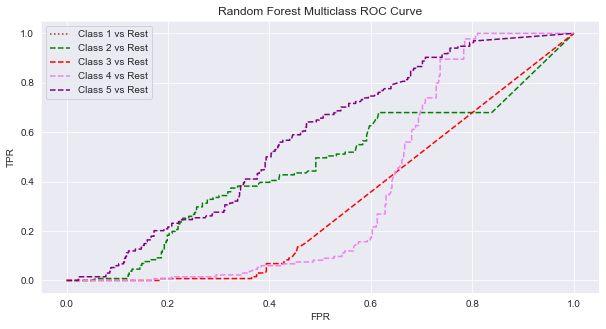

In [34]:
rf = RandomForestClassifier(criterion= "entropy", max_depth= 10, max_features= 'auto', min_samples_split= 4, n_estimators = 15 )
                                                   
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

pred_prob = rf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):   
    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))

plt.plot(fpr[0], tpr[0], linestyle=':',color='brown', label='Class 1 vs Rest')

plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')

plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 3 vs Rest')

plt.plot(fpr[3], tpr[3], linestyle='--',color='violet', label='Class 4 vs Rest')

plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Random Forest Multiclass ROC Curve')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.legend(loc='best')

## ***Confusion Matrix***

[Text(0, 0.5, 'Working at computer'),
 Text(0, 1.5, 'Standingup, walking & going up/down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going up/down stairsg')]

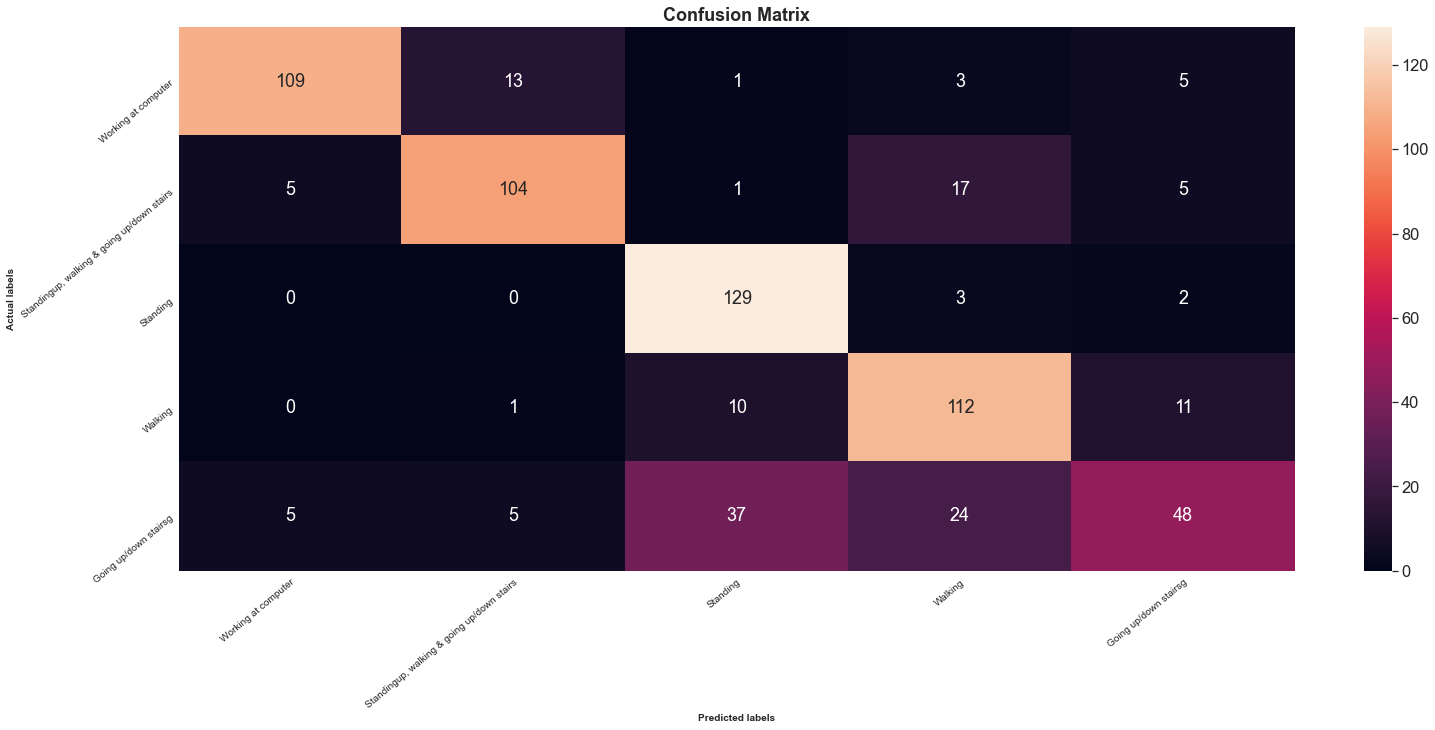

In [35]:
fig = plt.figure(figsize=(25, 10))

ax = plt.subplot()

sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, ax = ax, fmt= 'g')

ax.set_xlabel('Predicted labels', fontweight = 'bold')

ax.set_ylabel('Actual labels', fontweight = 'bold')

ax.set_title("Confusion Matrix",fontweight = 'bold')

plt.setp(ax.get_yticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

plt.setp(ax.get_xticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

ax.xaxis.set_ticklabels(target_names)

ax.yaxis.set_ticklabels(target_names)

#  ***Apply Logestic Regression*** 

In [36]:
lr = LogisticRegression(random_state= 0)

parameters = {"penalty" : ['l1','l2'], "C" : [0.001,0.01,0.1,1,10,100,1000], 'solver' : ['lbfgs', 'sag','saga','newton-cg']}

lr_gs = GridSearchCV(lr, param_grid=parameters, scoring='accuracy', n_jobs= -1, cv = 10, return_train_score=True)

lr_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             return_train_score=True, scoring='accuracy')

In [37]:
print("Best cross-validation score: {:.2f}".format(lr_gs.best_score_))

print("Best parameters: ", lr_gs.best_params_)

Best cross-validation score: 0.66
Best parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [38]:
lr = LogisticRegression(penalty='l1',C = 1 , solver='saga' )
                                                   
lr.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [39]:
lr_pred = lr.predict(X_test)

print("Accuracy score for Logestic Regression on test data : ",(accuracy_score(y_test, lr_pred))*100)


print('\n classification_report of Logestic Regression : \n\n',classification_report(y_test, lr_pred, digits=3, target_names = target_names ))

Accuracy score for Logestic Regression on test data :  66.46153846153847

 classification_report of Logestic Regression : 

                                             precision    recall  f1-score   support

                       Working at computer      0.929     0.802     0.861       131
Standingup, walking & going up/down stairs      0.657     0.682     0.669       132
                                  Standing      0.555     0.985     0.710       134
                                   Walking      0.606     0.493     0.543       134
                     Going up/down stairsg      0.736     0.328     0.453       119

                                  accuracy                          0.665       650
                                 macro avg      0.696     0.658     0.647       650
                              weighted avg      0.695     0.665     0.651       650



### ***ROC - AUC Score***

In [40]:
y_prob = lr.predict_proba(X_test)

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average='weighted')

print("ROC-AUC Score for LR: ",macro_roc_auc_ovr)

ROC-AUC Score for LR:  0.861725089459835


### ROC-AUC Curve

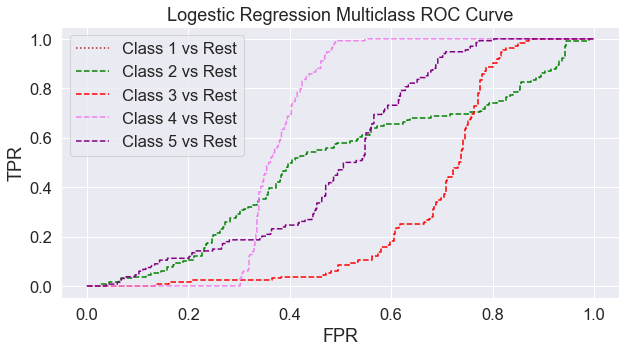

In [41]:
lr = LogisticRegression(penalty='l1',C = 1 , solver='saga' )
                                                   
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

pred_prob = lr.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):   
    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))

plt.plot(fpr[0], tpr[0], linestyle=':',color='brown', label='Class 1 vs Rest')

plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')

plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 3 vs Rest')

plt.plot(fpr[3], tpr[3], linestyle='--',color='violet', label='Class 4 vs Rest')

plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Logestic Regression Multiclass ROC Curve')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.legend(loc='best')

### ***Confusion Matrix of LR***

[Text(0, 0.5, 'Working at computer'),
 Text(0, 1.5, 'Standingup, walking & going up/down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going up/down stairsg')]

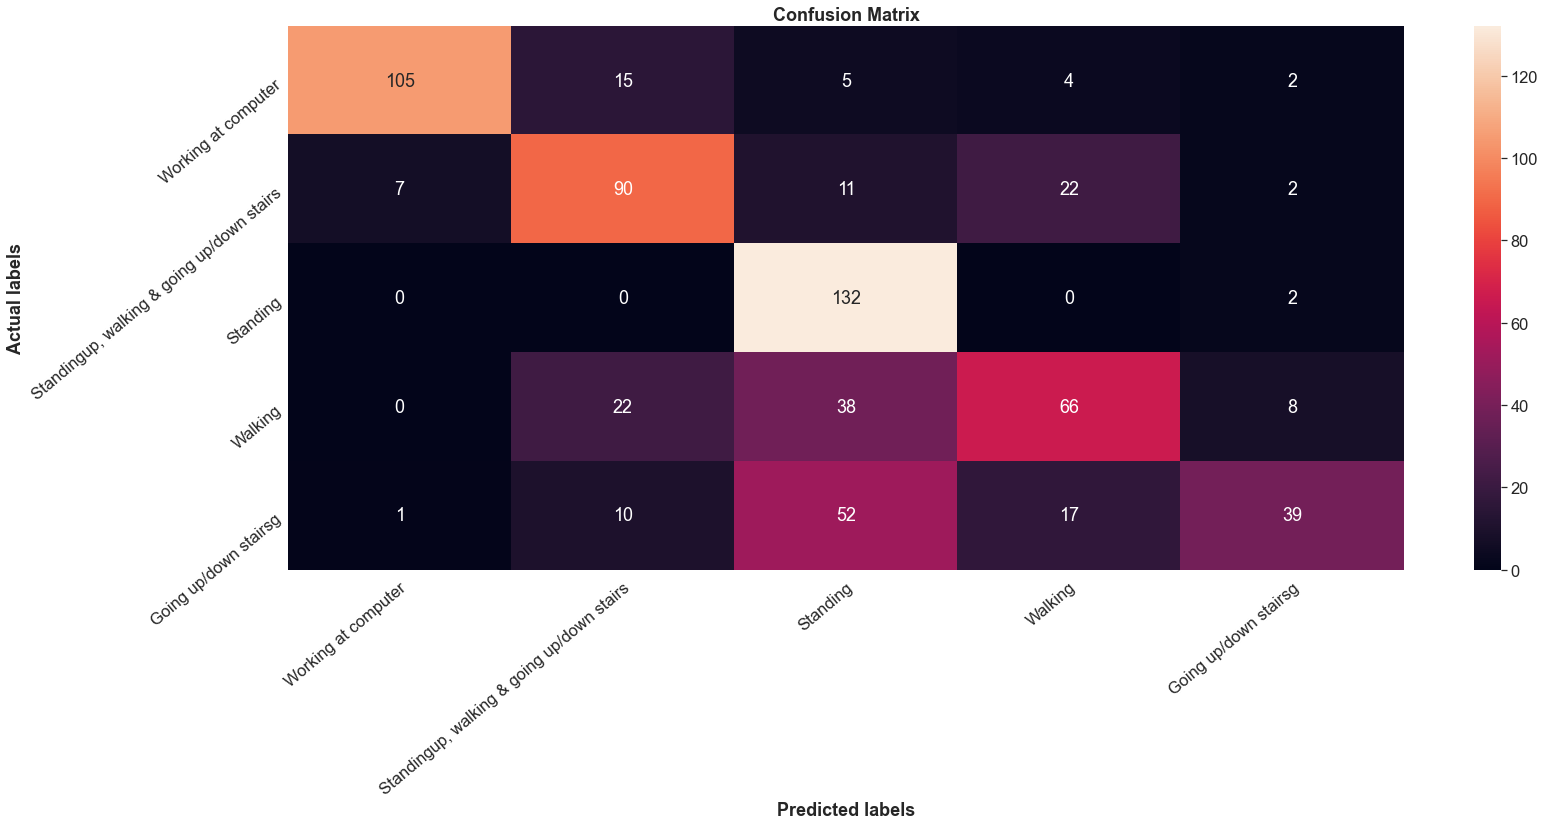

In [42]:
fig = plt.figure(figsize=(25, 10))

ax = plt.subplot()

sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, ax = ax, fmt= 'g')

ax.set_xlabel('Predicted labels', fontweight = 'bold')

ax.set_ylabel('Actual labels', fontweight = 'bold')

ax.set_title("Confusion Matrix",fontweight = 'bold')

plt.setp(ax.get_yticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

plt.setp(ax.get_xticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

ax.xaxis.set_ticklabels(target_names)

ax.yaxis.set_ticklabels(target_names)

#  ***Apply SVM***

In [43]:
svc = SVC(random_state=0)

parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [0.001, 0.01, 0.1, 1]}
                    

svc_gs = GridSearchCV(svc, param_grid=parameters, scoring='accuracy', n_jobs= -1, cv = 10, return_train_score=True)

svc_gs.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [44]:
print("Best cross-validation score: {:.2f}".format(svc_gs.best_score_))

print("Best parameters: ", svc_gs.best_params_)

Best cross-validation score: 0.65
Best parameters:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [45]:
svc = SVC(C = 1, gamma=0.001, kernel='linear' , probability=True )
                                                   
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='linear', probability=True)

In [46]:
svc_pred = svc.predict(X_test)

print("Accuracy score for SVC on test data : ",(accuracy_score(y_test, svc_pred))*100)


print('\n classification_report of SVC : \n\n',classification_report(y_test, svc_pred, digits=3, target_names = target_names ))

Accuracy score for SVC on test data :  66.15384615384615

 classification_report of SVC : 

                                             precision    recall  f1-score   support

                       Working at computer      0.972     0.794     0.874       131
Standingup, walking & going up/down stairs      0.710     0.705     0.707       132
                                  Standing      0.513     1.000     0.678       134
                                   Walking      0.612     0.470     0.532       134
                     Going up/down stairsg      0.750     0.303     0.431       119

                                  accuracy                          0.662       650
                                 macro avg      0.711     0.654     0.644       650
                              weighted avg      0.709     0.662     0.648       650



### ***ROC - AUC Score***

In [47]:
y_prob = svc.predict_proba(X_test)

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average='weighted')

print("ROC-AUC Score for SVC: ",macro_roc_auc_ovr)

ROC-AUC Score for SVC:  0.866351344792901


### ***ROC - AUC Curve***

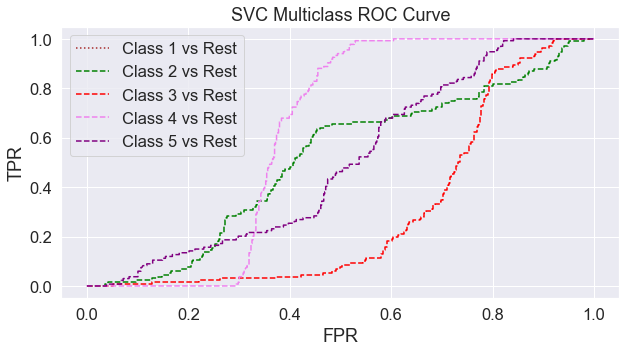

In [48]:
svc = SVC(C = 1, gamma=0.001, kernel='linear' , probability=True )
                                                   
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

pred_prob = svc.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):   
    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))

plt.plot(fpr[0], tpr[0], linestyle=':',color='brown', label='Class 1 vs Rest')

plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')

plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 3 vs Rest')

plt.plot(fpr[3], tpr[3], linestyle='--',color='violet', label='Class 4 vs Rest')

plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('SVC Multiclass ROC Curve')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.legend(loc='best')

### ***Confusion Matrix***

[Text(0, 0.5, 'Working at computer'),
 Text(0, 1.5, 'Standingup, walking & going up/down stairs'),
 Text(0, 2.5, 'Standing'),
 Text(0, 3.5, 'Walking'),
 Text(0, 4.5, 'Going up/down stairsg')]

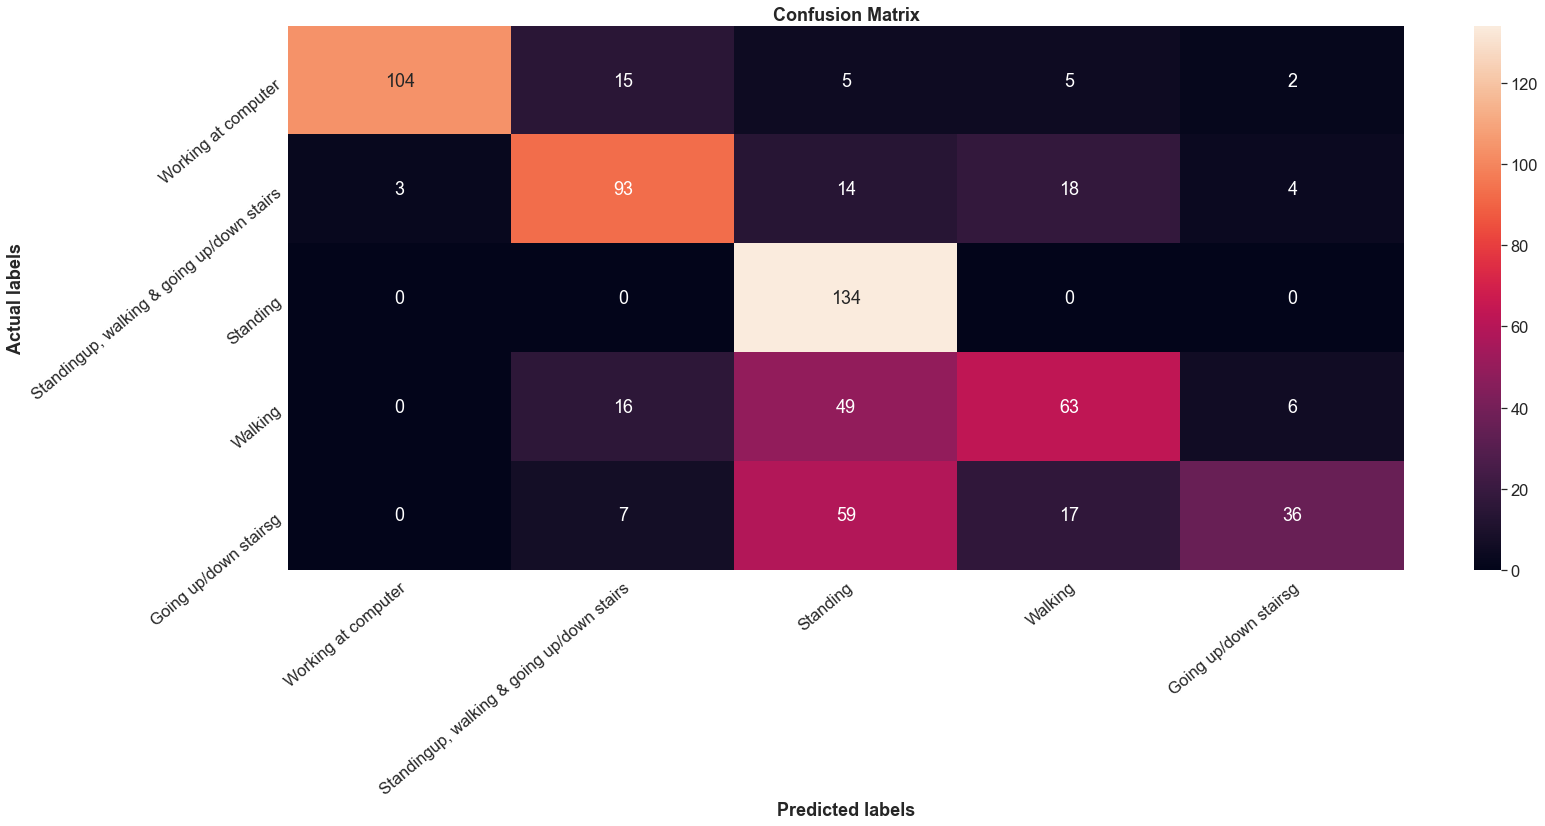

In [49]:
fig = plt.figure(figsize=(25, 10))

ax = plt.subplot()

sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True, ax = ax, fmt= 'g')

ax.set_xlabel('Predicted labels', fontweight = 'bold')

ax.set_ylabel('Actual labels', fontweight = 'bold')

ax.set_title("Confusion Matrix",fontweight = 'bold')

plt.setp(ax.get_yticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

plt.setp(ax.get_xticklabels(), rotation = 40, ha = 'right', rotation_mode='anchor')

ax.xaxis.set_ticklabels(target_names)

ax.yaxis.set_ticklabels(target_names)

### ***Summary***

In [51]:
x = PrettyTable() #initialize

x.field_names = [ "Model", "Accuracy Percentage"] # column 

x.add_row([ "Random Forest Classifier", 77.23]) #row fields

x.add_row([ "Logestic Regression", 66.46]) #row fields

x.add_row([ "SVC", 66.15]) #row fields

print(x)

+--------------------------+---------------------+
|          Model           | Accuracy Percentage |
+--------------------------+---------------------+
| Random Forest Classifier |        77.23        |
|   Logestic Regression    |        66.46        |
|           SVC            |        66.15        |
+--------------------------+---------------------+


1)  In this task I applid Random Forest Classifier , Logestic Regression and SVC.


2) Among three alogorithms RF gave more accuracy than remining alogirithms.
